SVM Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      1301
           1       0.85      0.90      0.87      1244

    accuracy                           0.87      2545
   macro avg       0.87      0.87      0.87      2545
weighted avg       0.87      0.87      0.87      2545



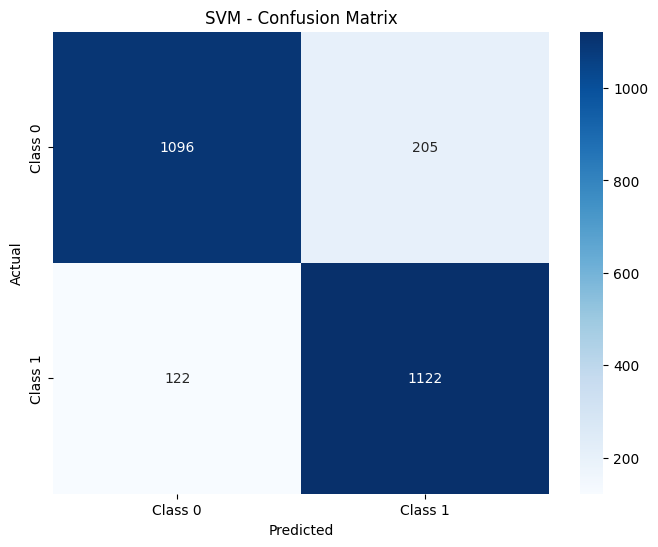

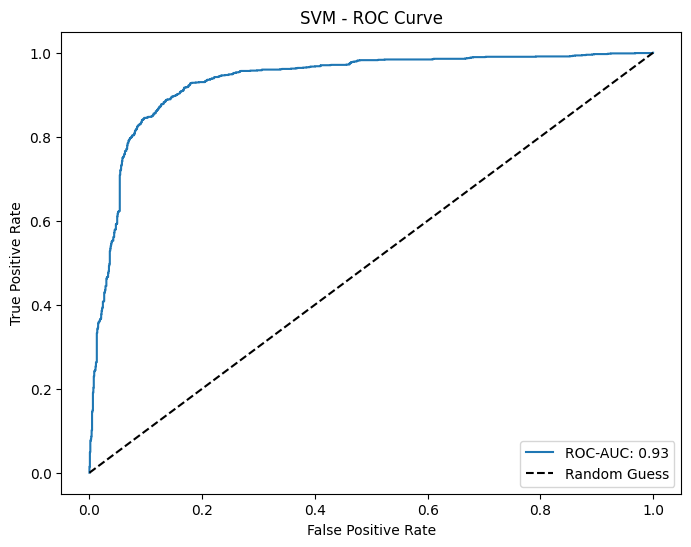

['support_vector_machine_model.pkl']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import joblib  

# Veriyi yükleme
data = pd.read_csv('data_vectorized.csv')

# Veriyi ayırma (özellikler ve etiketler)
X = data.drop(columns=['Label'])  # Etiket hariç tüm sütunlar
y = data['Label']  # Etiket

# Veriyi eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM modelini oluşturma ve eğitim
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)  # 'linear' kernel kullanıyoruz
svm_classifier.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred = svm_classifier.predict(X_test)

# Doğruluk hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {accuracy:.2f}")

# Precision, Recall, F1-Score
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Hesaplama ve Grafik
if len(set(y_test)) == 2:  # İkili sınıflandırma kontrolü
    roc_auc = roc_auc_score(y_test, svm_classifier.predict_proba(X_test)[:, 1])  # Tahmin olasılıkları
    fpr, tpr, thresholds = roc_curve(y_test, svm_classifier.predict_proba(X_test)[:, 1])
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC-AUC: {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("SVM - ROC Curve")
    plt.legend()
    plt.show()

# SVM modelini kaydetme
joblib.dump(svm_classifier, 'support_vector_machine_model.pkl')  # Modeli kaydet
